In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Start - Load Data from Part 1

In [2]:
data=pd.read_csv('referral_propensity_full_set.csv')
data.head(10)

,Unnamed: 0,user_reference,age,city,province,occupation,skill_level_clean,num_viewed,num_clicked,ref_page_view_click,...,reg_lag,kyc_lag,afa_lag,if_afa,outbound_etransfer_counts,cashback_total_amt,spend,load,referred_counts,if_referred_180
0,0,_k0NAGFv,57.0,Grande Prairie,Alberta,Elementary And Secondary School Teacher Assist...,C,90.0,114.0,0.0,...,291,291,281,1,NaN,2.26,449.44,1650.00,NaN,0
1,1,BhNJhXDy,45.0,Peterview,Newfoundland and Labrador,Labourer in Manufacturing Other,D,57.0,43.0,0.0,...,278,278,260,1,NaN,1.54,309.20,350.00,NaN,0
2,2,auryKkFv,51.0,upper port la tour,Nova Scotia,Advertising Manager,O,305.0,201.0,1.0,...,289,289,269,1,3.0,5.43,248.67,682.57,NaN,0
3,3,Se.4dcyR,29.0,Barrie,Ontario,Early Childhood Educator Or Assistant,B,338.0,476.0,1.0,...,288,288,288,1,NaN,9.20,1780.10,2064.29,NaN,0
4,4,SaBVGXck,20.0,Verdun,Quebec,Student,Student,86.0,74.0,0.0,...,280,280,260,1,NaN,5.18,1046.48,1090.00,NaN,0
5,5,cuVnwde2,19.0,St-Zotique,Quebec,Student,Student,91.0,206.0,1.0,...,276,276,276,1,NaN,14.05,990.21,1600.00,NaN,0
6,6,0Oog6kaV,40.0,Montreal,Quebec,Mathematician,A,140.0,120.0,0.0,...,282,282,281,1,NaN,9.73,1786.54,2086.30,NaN,0
7,7,lgHrQfdf,41.0,Longueuil,Quebec,Software Engineer,A,87.0,241.0,1.0,...,286,286,286,1,NaN,57.00,10839.73,11076.25,NaN,0
8,8,tH0dsfnv,27.0,Montreal,Quebec,Executive Assistant,B,239.0,263.0,0.0,...,289,289,280,1,18.0,13.16,2633.32,3745.00,NaN,0
9,9,NqPAkZm7,36.0,Truax,Saskatchewan,Cashier,D,28.0,40.0,1.0,...,272,272,272,1,NaN,1.16,231.00,457.00,NaN,0


In [3]:
len(data)

259730

In [4]:
data.columns

Index(['Unnamed: 0', 'user_reference', 'age', 'city', 'province', 'occupation',
       'skill_level_clean', 'num_viewed', 'num_clicked', 'ref_page_view_click',
       'referral_code_copied', 'link_shared_completed', 'sms_referral_shared',
       'total_shares', 'get_20_page_view_counts', 'media_category', 'device',
       'install_lag', 'reg_lag', 'kyc_lag', 'afa_lag', 'if_afa',
       'outbound_etransfer_counts', 'cashback_total_amt', 'spend', 'load',
       'referred_counts', 'if_referred_180'],
      dtype='object')

# Label

In [5]:
y=data[['if_referred_180']]

# Geo Cleaning (Geo data - Not a good feature after testing)

In [6]:
# def Geo_Region(data):
    
#     data["geo_region"]=""
#     for i in range(len(data)):
#         if data["province"][i] in ('Ontario','Quebec','Nova Scotia','New Brunswick','Newfoundland and Labrador','Prince Edward Island'):
#             data["geo_region"][i]="Eastern Canada"
#         if data["province"][i] in ('Saskatchewan','Alberta',"Manitoba",'British Columbia'):
#             data["geo_region"][i]="Western Provinces"
#         if data["province"][i] in ('Northwest Territories', 'Yukon','Nunavut'):
#             data["geo_region"][i]="North Canada"
            
            
#     return data


# data=Geo_Region(data)
# data.head(10)

In [7]:
X=data


In [8]:
X.columns

Index(['Unnamed: 0', 'user_reference', 'age', 'city', 'province', 'occupation',
       'skill_level_clean', 'num_viewed', 'num_clicked', 'ref_page_view_click',
       'referral_code_copied', 'link_shared_completed', 'sms_referral_shared',
       'total_shares', 'get_20_page_view_counts', 'media_category', 'device',
       'install_lag', 'reg_lag', 'kyc_lag', 'afa_lag', 'if_afa',
       'outbound_etransfer_counts', 'cashback_total_amt', 'spend', 'load',
       'referred_counts', 'if_referred_180'],
      dtype='object')

In [9]:
categorical_columns = [

    'skill_level_clean', 'media_category',
       'device']

numerical_columns = [
    'age', 
    
    'install_lag', 'reg_lag', 'kyc_lag', 'afa_lag', 'if_afa',

    'num_viewed', 'num_clicked',
    
    'ref_page_view_click', 
    
    'referral_code_copied','sms_referral_shared', 'link_shared_completed', 'total_shares',
    
     'outbound_etransfer_counts', 'cashback_total_amt', 'spend', 'load',

       'get_20_page_view_counts'

]

In [10]:
X = X[categorical_columns + numerical_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

categorical_encoder = OneHotEncoder(handle_unknown="ignore")
numerical_pipe = Pipeline([("imputer", SimpleImputer(strategy="mean"))])

In [11]:
X=X.fillna(0)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259730 entries, 0 to 259729
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   skill_level_clean          259730 non-null  object 
 1   media_category             259730 non-null  object 
 2   device                     259730 non-null  object 
 3   age                        259730 non-null  float64
 4   install_lag                259730 non-null  int64  
 5   reg_lag                    259730 non-null  int64  
 6   kyc_lag                    259730 non-null  int64  
 7   afa_lag                    259730 non-null  int64  
 8   if_afa                     259730 non-null  int64  
 9   num_viewed                 259730 non-null  float64
 10  num_clicked                259730 non-null  float64
 11  ref_page_view_click        259730 non-null  float64
 12  referral_code_copied       259730 non-null  float64
 13  sms_referral_shared        25

# Feature Selection (Random Forest Classification and Permutation Importance)

In [12]:
preprocessing = ColumnTransformer(
    [
        ("cat", categorical_encoder, categorical_columns),
        ("num", numerical_pipe, numerical_columns),
    ]
)

rf = Pipeline(
    [
        ("preprocess", preprocessing),
        ("classifier", RandomForestClassifier(random_state=42)),
    ]
)


rf.fit(X_train, y_train)

/Users/lilian/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['skill_level_clean',
                                                   'media_category',
                                                   'device']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['age', 'install_lag',
                                                   'reg_lag', 'kyc_lag',
                                                   'afa_lag', 'if_afa',
                                                   'num_viewed', 'num_clicked',
                                                   'ref_page_view_click',
                        

In [13]:
# rf

# preprocessing

print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))

RF train accuracy: 1.000
RF test accuracy: 0.951


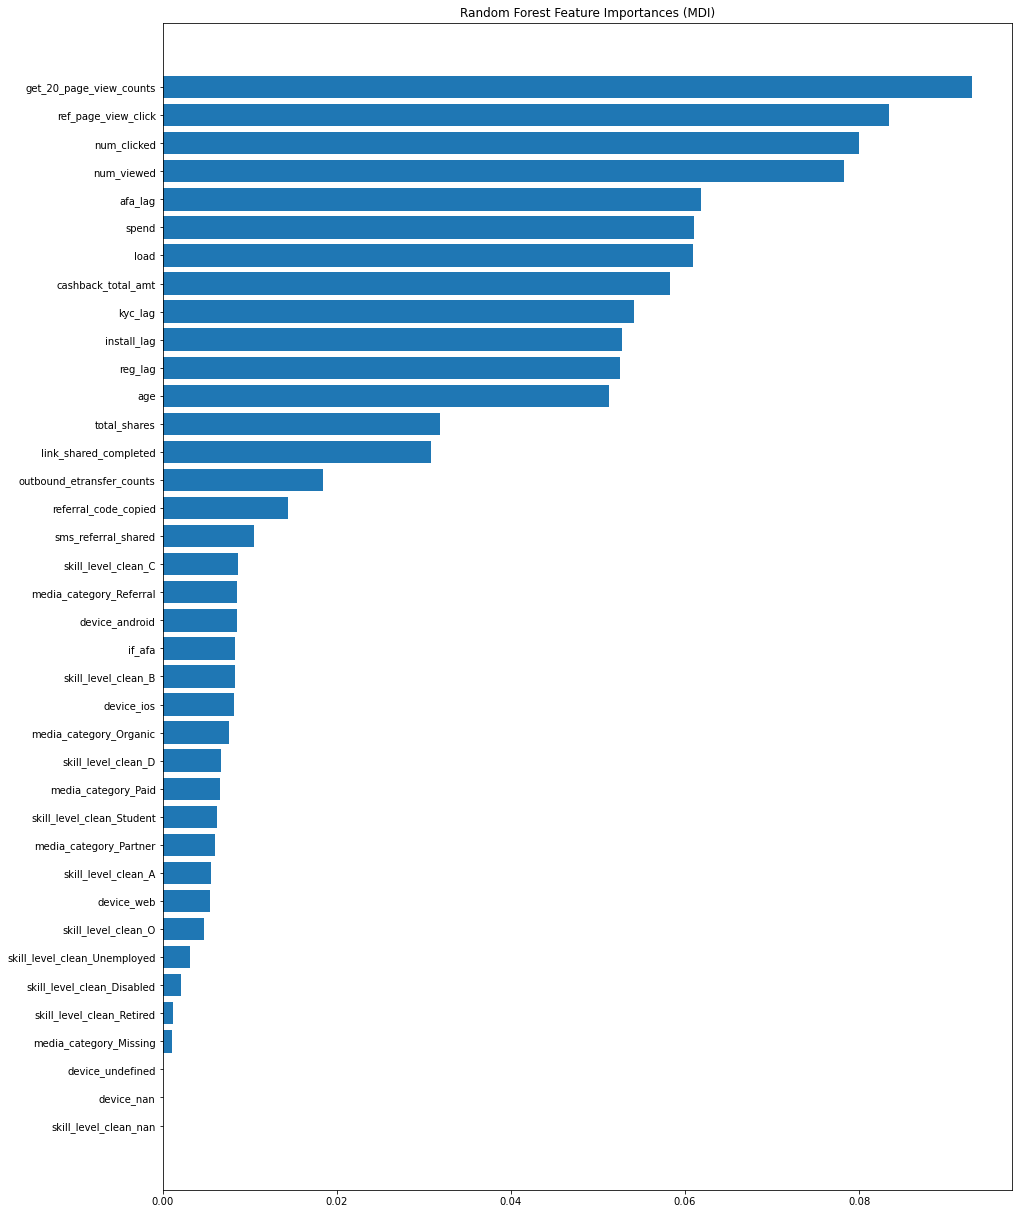

In [14]:
ohe = rf.named_steps["preprocess"].named_transformers_["cat"]
feature_names = ohe.get_feature_names_out(categorical_columns)
feature_names = np.r_[feature_names, numerical_columns]

tree_feature_importances = rf.named_steps["classifier"].feature_importances_
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()


fig.set_figheight(20)
fig.set_figwidth(20)


plt.show()


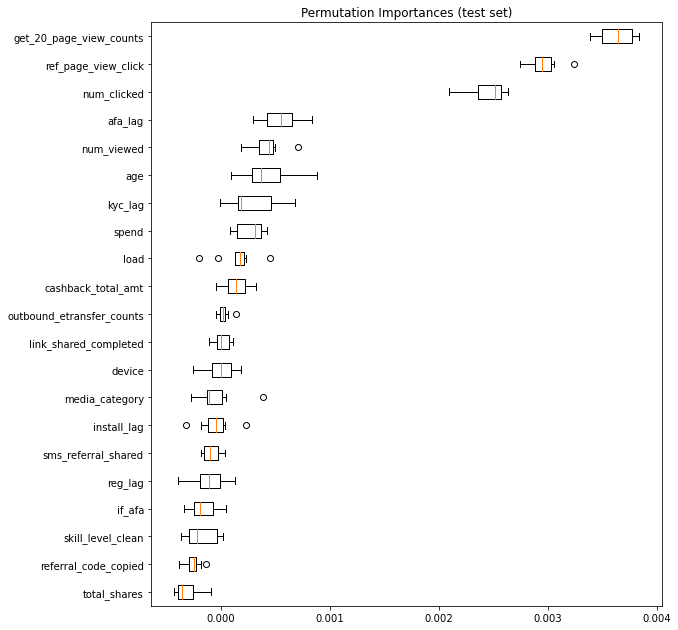

In [15]:
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx]
)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()

fig.set_figheight(10)
fig.set_figwidth(12)

plt.show()